# Covid-19 Prediction On Chest CT Scans Using CNN

### Load the CT scan images data

In [1]:
# import neccessary Libraries and modules
import pandas as pd
import numpy as np
import os
from glob import glob
import matplotlib.pylab as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Get all images from two directories
covid_path = glob('C:\\Users\\srivi\\Downloads\\msc project\\archive\\COVID-19 Dataset\\CT\\COVID\*.png', recursive=True)
noncovid_path = glob('C:\\Users\\srivi\\Downloads\\msc project\\archive\\COVID-19 Dataset\\CT\\Non-COVID\*.png', recursive=True)

In [2]:
# checkinig the covid data size
len(covid_path)

5347

In [3]:
# check non-covid data size
len(noncovid_path)

2424

In [4]:
%%time
# Convert all the images to single size (400, 400) and seperate each class.
from matplotlib.image import imread
import cv2
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

def img_array(data,label):
    arrays = []
    labels = []
    for i in data:
        if i.endswith('.png'):
            img = cv2.imread(i)                                   # Read image
            img_sized = cv2.resize(img, (256,256))    # Resize image
            img_array = img_to_array(img_sized) / 255                               # Convert image to array
            arrays.append(img_array)                                                # Append image arrays
            labels.append(label)                                                    # Append image labels
    return(arrays, labels)

covid_array = img_array(covid_path,1)                                           # Store all covid images as class 1
noncovid_array = img_array(noncovid_path,0)                               # Store all non-covid images as class 0

CPU times: total: 33.6 s
Wall time: 1min 59s


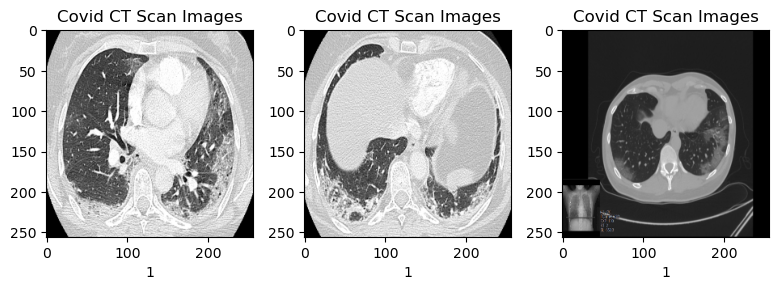

In [5]:
# Plot the covid chest ct scan images (class 1)
plt.figure(figsize=(8,8))
for i in range(1,4):
    plt.subplot(1,3,i)
    plt.tight_layout()
    plt.imshow(covid_array[0][i])         # Select class0 images
    plt.title('Covid CT Scan Images')
    plt.xlabel(covid_array[1][i], fontsize=10)

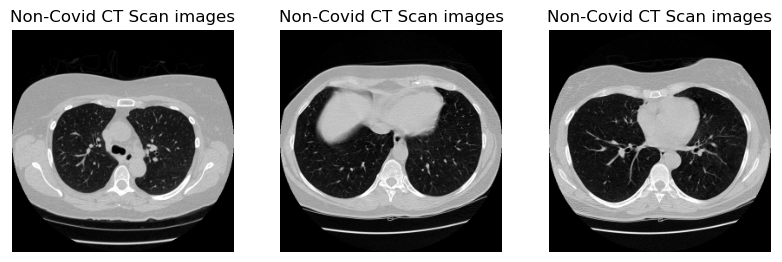

In [6]:
# Plot the non-covid chest ct scan images
plt.figure(figsize=(8,8))
for i in range(1,4):
    plt.subplot(1,3,i)
    plt.tight_layout()
    plt.imshow(noncovid_array[0][i])      
    plt.title('Non-Covid CT Scan images')
    plt.axis('off')

In [7]:
# Check the covid images label.
covid_array[0]

[array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]], dtype=float32),
 array([[[0., 0., 0.],
         [0., 0.,

In [8]:
# Check the covid images label.
covid_array[1]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


### Data Augmentation

In [9]:
### Data Augmentation on non covid images 100% increase (2680 images).

from keras.preprocessing.image import ImageDataGenerator

# Giving all augemantation methods at once.
datagen_tr_def = ImageDataGenerator( horizontal_flip = True, vertical_flip = True, rotation_range = 60)

i = 0
for batch in datagen_tr_def.flow(np.array(noncovid_array[0]), batch_size=128,
                          save_to_dir= r'C:\\Users\\srivi\\Downloads\\msc project\\archive\\COVID-19 Dataset\\CT\\Aug',
                          save_prefix='noncv_aug',
                          save_format='png'):    
    i += 1    
    if i > 20:        
        break       

In [10]:
# Load augmented data
aug_noncovid_path = glob('C:\\Users\\srivi\\Downloads\\msc project\\archive\\COVID-19 Dataset\\CT\\Aug\\*.png')

# check non-covid augmented data size
len(aug_noncovid_path)

24110

In [11]:
# Load augmented data and combine these with all other images
all_noncovid_path = glob('C:\\Users\\srivi\\Downloads\\msc project\\archive\\COVID-19 Dataset\\CT\\ALL NON-COVID DATA\\*.png')

# check non-covid augmented data size
len(all_noncovid_path)

5104

In [12]:
%%time
# Convert all the images to single size (400, 400) and seperate each class.
from matplotlib.image import imread
import cv2
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

def img_array(data,label):
    arrays = []
    labels = []
    for i in data:
        if i.endswith('.png'):
            img = cv2.imread(i)                                   # Read image
            img_sized = cv2.resize(img, (256,256))    # Resize image
            img_array = img_to_array(img_sized) / 255                               # Convert image to array
            arrays.append(img_array)                                                # Append image arrays
            labels.append(label)                                                    # Append image labels
    return(arrays, labels)

all_noncovid_array = img_array(all_noncovid_path,0)                               # Store all non-covid images as class 0

CPU times: total: 6.69 s
Wall time: 1min


In [13]:
# Append all covid & non-covid data

data_arrays = np.concatenate((all_noncovid_array[0], covid_array[0]),axis=0)        # combine both class arrays
data_labels = np.concatenate((all_noncovid_array[1], covid_array[1]),axis=0)        # Combine both class labels

In [14]:
# Check the shape of the data.
print('Images data shape:',data_arrays.shape)       # combined data shape
print('class shape:',data_labels.shape)            # combined data label

Images data shape: (10450, 256, 256, 3)
class shape: (10450,)


In [15]:
data_labels

array([0, 0, 0, ..., 1, 1, 1])

In [16]:
## split train / test data
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(list(range(data_arrays.shape[0])), train_size=0.8, test_size=0.2,random_state=123)

x_train_df = data_arrays[train_df]        # Train images
y_train_df = data_labels[train_df]       # Train data images label
x_test_df = data_arrays[test_df]          # Test data images
y_test_df = data_labels[test_df]         # Test data labels

In [17]:
import keras
from keras.utils import np_utils
## Do one-hot encoding into two categories (since target variable is binary)
y_train_df = keras.utils.np_utils.to_categorical(y_train_df, 2)          # Train data labels
y_test_df = keras.utils.np_utils.to_categorical(y_test_df, 2)         # Test data labels
y_train_df.shape, y_test_df.shape

((8360, 2), (2090, 2))

### CNN Model Building

In [18]:
# Import Deep learning libraries (For Model Building)
import cv2
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Activation, Flatten
from keras.layers import MaxPooling2D

In [19]:
%%time
# Building the CNN model
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))         # Pooling layer
model.add(Dropout(0.2))                            # Dropout layer

model.add(Conv2D(64, (3,3), activation ='relu'))   # Activation layer
model.add(MaxPooling2D(pool_size = (2,2)))         # Pooling layer
model.add(Dropout(0.2))                            # Dropout layer

model.add(Conv2D(128, (3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))         # Pooling layer
model.add(Dropout(0.2))                            # Dropout layer

model.add(Flatten())                               # Flattening layer 
model.add(Dense(256, activation = "relu"))         # Dense layer 1
model.add(Dense(2, activation = "softmax"))        # Dense layer 2

# model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn = model.fit(x_train_df,y_train_df, validation_data=(x_test_df, y_test_df), epochs=5)         # Fitting the model

Epoch 1/5
262/262 [==============================] - 265s 999ms/step - loss: 0.4055 - accuracy: 0.8301 - val_loss: 0.1990 - val_accuracy: 0.9067
Epoch 2/5
262/262 [==============================] - 250s 954ms/step - loss: 0.1727 - accuracy: 0.9248 - val_loss: 0.1616 - val_accuracy: 0.9254
Epoch 3/5
262/262 [==============================] - 246s 939ms/step - loss: 0.1159 - accuracy: 0.9519 - val_loss: 0.1499 - val_accuracy: 0.9359
Epoch 4/5
262/262 [==============================] - 252s 963ms/step - loss: 0.0871 - accuracy: 0.9650 - val_loss: 0.1541 - val_accuracy: 0.9311
Epoch 5/5
262/262 [==============================] - 273s 1s/step - loss: 0.0701 - accuracy: 0.9694 - val_loss: 0.1687 - val_accuracy: 0.9368
CPU times: total: 2h 34min 2s
Wall time: 21min 28s


In [20]:
# Evaluating the model on training and testing data.
train_perf = model.evaluate(x_train_df, y_train_df)
val_perf = model.evaluate(x_test_df, y_test_df)
print("Training Accuracy: %.2f%%"%(train_perf[1] * 100))      # Train accuracy
print("Validation Accuracy: %.2f%%"%(val_perf[1] * 100))      # Testing accuracy

66/66 [==============================] - 22s 330ms/step - loss: 0.1687 - accuracy: 0.9368
Training Accuracy: 97.89%
Validation Accuracy: 93.68%


In [ ]:
# Predictions on the train data
from sklearn.metrics import confusion_matrix
import seaborn as sns
pred_train1 = model.predict(x_train_df)

# Plot the confusion matrix of train data
corr_plot1 = confusion_matrix(np.argmax(y_train_df, axis=1), np.argmax(pred_train1, axis=1))
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(corr_plot1, cmap='Greens', annot=True, fmt='d')
plt.title('Covid Diagnosis on Train data (0:Non-covid, 1:Covid)')
plt.xlabel('Prediction values')
plt.ylabel('Actual values')
plt.show(ax)

66/66 [==============================] - 22s 327ms/step


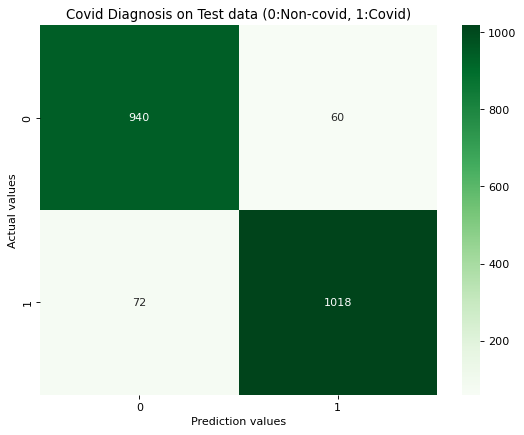

In [21]:
# Predictions on the test data
from sklearn.metrics import confusion_matrix
import seaborn as sns
pred_test1 = model.predict(x_test_df)

# Plot the confusion matrix of test data
corr_plot1 = confusion_matrix(np.argmax(y_test_df, axis=1), np.argmax(pred_test1, axis=1))
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(corr_plot1, cmap='Greens', annot=True, fmt='d')
plt.title('Covid Diagnosis on Test data (0:Non-covid, 1:Covid)')
plt.xlabel('Prediction values')
plt.ylabel('Actual values')
plt.show(ax)

66/66 [==============================] - 22s 331ms/step


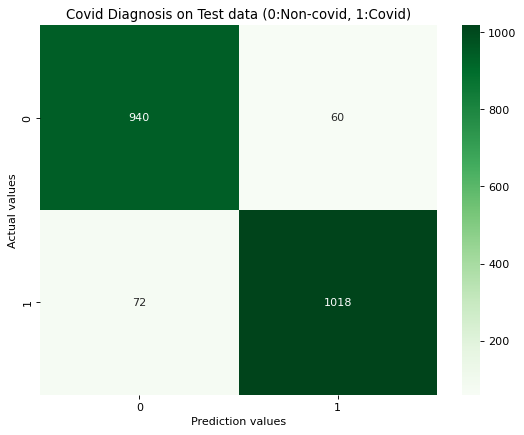

In [22]:
# Predictions on the test data
from sklearn.metrics import confusion_matrix
import seaborn as sns
pred_test1 = model.predict(x_test_df)

# Plot the confusion matrix of test data
corr_plot1 = confusion_matrix(np.argmax(y_test_df, axis=1), np.argmax(pred_test1, axis=1))
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(corr_plot1, cmap='Greens', annot=True, fmt='d')
plt.title('Covid Diagnosis on Test data (0:Non-covid, 1:Covid)')
plt.xlabel('Prediction values')
plt.ylabel('Actual values')
plt.show(ax)

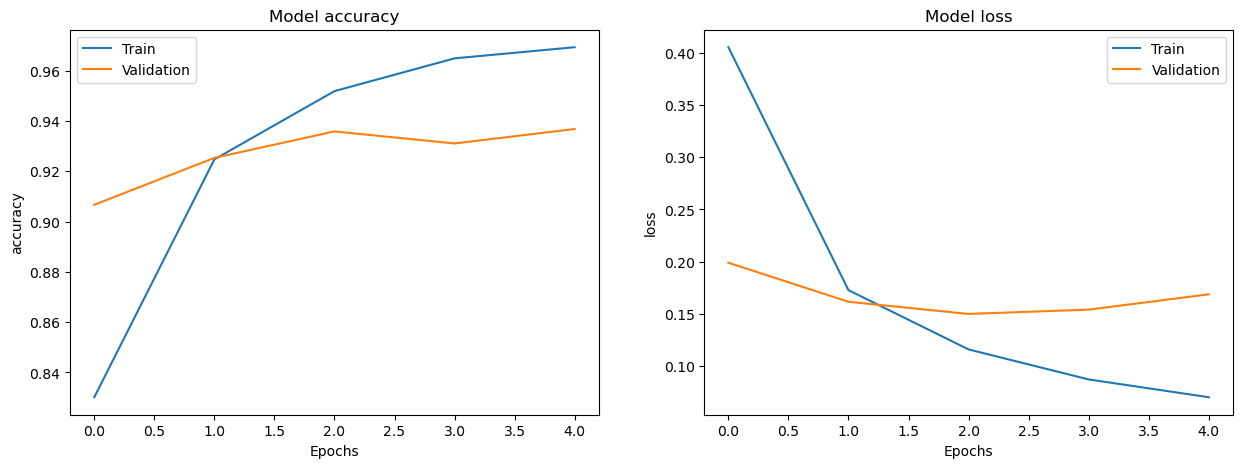

In [23]:
# Plotting the trend of the metrics during training and testing.

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax = ax.ravel()

# for loop for ploting accuracy and loss.
for i, metric in enumerate(["accuracy", "loss"]):
    ax[i].plot(nn.history[metric])
    ax[i].plot(nn.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["Train", "Validation"])

In [24]:
# CNN Model Architecture
model.summary()             # CNN model have 29.6 Million parameters

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 64)        0

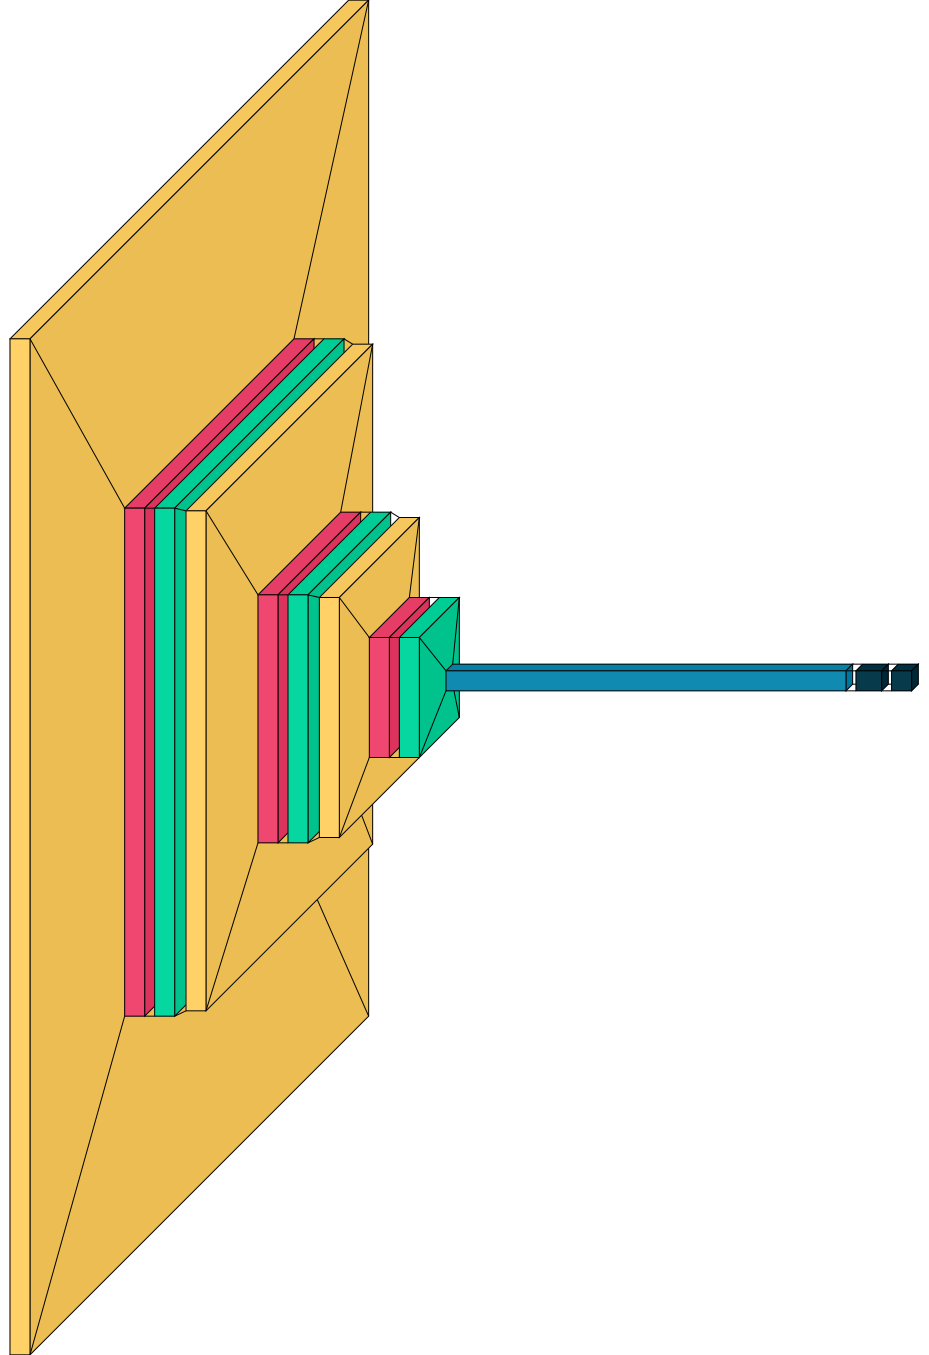

In [25]:
# Visualize the model architecture (with Max pooling layer)
import visualkeras
visualkeras.layered_view(model) 

🟨 - Convolutional Layer    
🟥 - Pooling Layer      
🟩 - Dropout Layer     
🟦 - Flatten Layer  
⬛️ - Dense Layer 

In [26]:
pip install visualkeras

Note: you may need to restart the kernel to use updated packages.


## Model - 2 (Without Dropout)

In [27]:
%%time
# Building the CNN model
model2 = Sequential()
model2.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (256, 256, 3)))
model2.add(MaxPooling2D(pool_size = (2,2)))         # Pooling layer

model2.add(Conv2D(64, (3,3), activation ='relu'))   # Activation layer
model2.add(MaxPooling2D(pool_size = (2,2)))         # Pooling layer

model2.add(Conv2D(128, (3,3), activation ='relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))         # Pooling layer

model2.add(Flatten())                               # Flattening layer
model2.add(Dense(256, activation = "relu"))         # Dense layer 1
model2.add(Dense(2, activation = "softmax"))        # Dense layer 2

# model.summary()
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn2 = model2.fit(x_train_df,y_train_df, validation_data=(x_test_df, y_test_df), epochs=5)         # Fitting the model

Epoch 1/5
262/262 [==============================] - 318s 1s/step - loss: 0.3083 - accuracy: 0.8651 - val_loss: 0.1684 - val_accuracy: 0.9191
Epoch 2/5
262/262 [==============================] - 315s 1s/step - loss: 0.1508 - accuracy: 0.9374 - val_loss: 0.1651 - val_accuracy: 0.9392
Epoch 3/5
262/262 [==============================] - 314s 1s/step - loss: 0.0971 - accuracy: 0.9622 - val_loss: 0.1328 - val_accuracy: 0.9455
Epoch 4/5
262/262 [==============================] - 314s 1s/step - loss: 0.0599 - accuracy: 0.9778 - val_loss: 0.1686 - val_accuracy: 0.9469
Epoch 5/5
262/262 [==============================] - 317s 1s/step - loss: 0.0367 - accuracy: 0.9858 - val_loss: 0.1408 - val_accuracy: 0.9579
CPU times: total: 3h 12min 34s
Wall time: 26min 17s


In [28]:
# Evaluating the model on training and testing data.
train_perf2 = model2.evaluate(x_train_df, y_train_df)
val_perf2 = model2.evaluate(x_test_df, y_test_df)
print("Training Accuracy: %.2f%%"%(train_perf2[1] * 100))      # Train accuracy
print("Validation Accuracy: %.2f%%"%(val_perf2[1] * 100))      # Testing accuracy

66/66 [==============================] - 22s 330ms/step - loss: 0.1408 - accuracy: 0.9579
Training Accuracy: 99.69%
Validation Accuracy: 95.79%


262/262 [==============================] - 87s 330ms/step


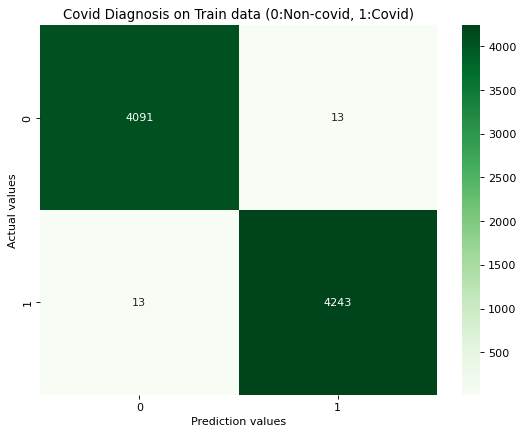

In [29]:
# Predictions on the train data
from sklearn.metrics import confusion_matrix
import seaborn as sns
pred_train2 = model2.predict(x_train_df)

# Plot the confusion matrix of train data
corr_plot2 = confusion_matrix(np.argmax(y_train_df, axis=1), np.argmax(pred_train2, axis=1))
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(corr_plot2, cmap='Greens', annot=True, fmt='d')
plt.title('Covid Diagnosis on Train data (0:Non-covid, 1:Covid)')
plt.xlabel('Prediction values')
plt.ylabel('Actual values')
plt.show(ax)

66/66 [==============================] - 22s 330ms/step


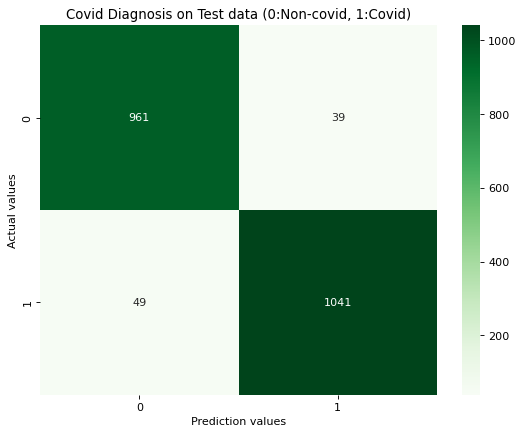

In [30]:
# Predictions on the test data
from sklearn.metrics import confusion_matrix
import seaborn as sns
pred_test2 = model2.predict(x_test_df)

# Plot the confusion matrix of test data
corr_plot2 = confusion_matrix(np.argmax(y_test_df, axis=1), np.argmax(pred_test2, axis=1))
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(corr_plot2, cmap='Greens', annot=True, fmt='d')
plt.title('Covid Diagnosis on Test data (0:Non-covid, 1:Covid)')
plt.xlabel('Prediction values')
plt.ylabel('Actual values')
plt.show(ax)

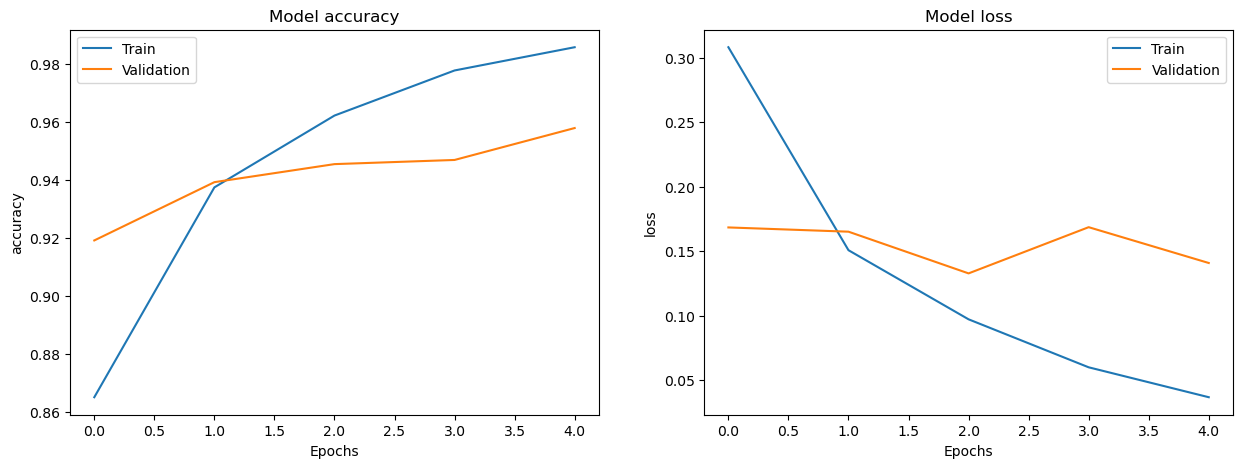

In [31]:
# Plotting the trend of the metrics during training and testing.

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax = ax.ravel()

# for loop for ploting accuracy and loss.
for i, metric in enumerate(["accuracy", "loss"]):
    ax[i].plot(nn2.history[metric])
    ax[i].plot(nn2.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["Train", "Validation"])

In [32]:
# CNN Model Architecture
model2.summary()             # CNN model have 29.6 Million parameters

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 128)     

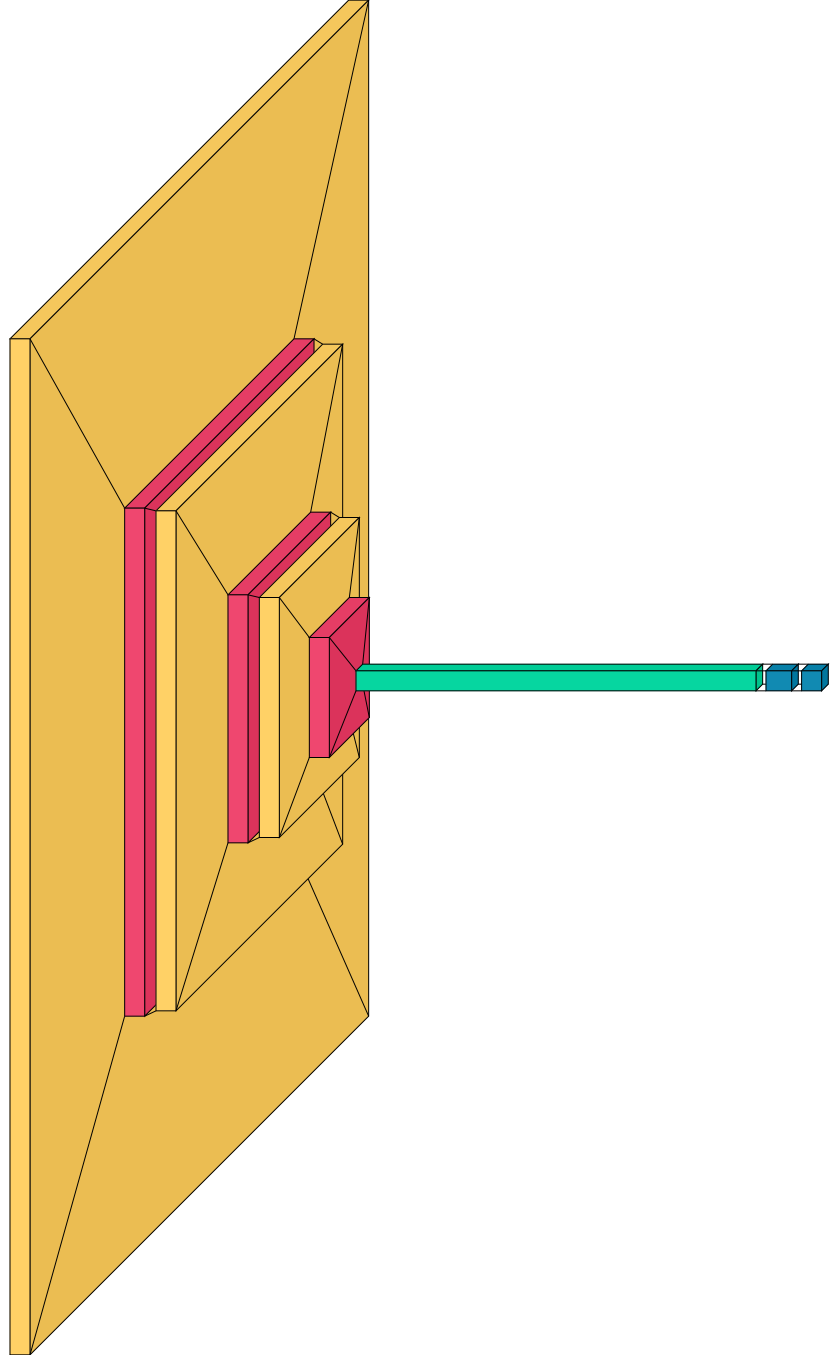

In [33]:
# Visualize the model architecture (without Dropout layer)
import visualkeras
visualkeras.layered_view(model2)

🟨 - Convolutional Layer    
🟥 - Pooling Layer      
🟩 - Flatten Layer     
🟦 - Dense Layer 

In [35]:
#Predictions on unseen data
# Load the unseen data (first 5 are covid positive, next 5 are covid negative images)
image_data = glob("C:\\Users\\srivi\\Downloads\\msc project\\Unseen_data\\*.png")
image_data
["C:\\Users\\srivi\\Downloads\\msc project\\Unseen_data\\cv5.png",
"C:\\Users\\srivi\\Downloads\\msc project\\Unseen_data\\cv4.png",
"C:\\Users\\srivi\\Downloads\\msc project\\Unseen_data\\cv3.png",
"C:\\Users\\srivi\\Downloads\\msc project\\Unseen_data\\cv2.png",
"C:\\Users\\srivi\\Downloads\\msc project\\Unseen_data\\cv1.png",
"C:\\Users\\srivi\\Downloads\\msc project\\Unseen_data\\nc1.png",
"C:\\Users\\srivi\\Downloads\\msc project\\Unseen_data\\nc2.png",
"C:\\Users\\srivi\\Downloads\\msc project\\Unseen_data\\nc3.png",
"C:\\Users\\srivi\\Downloads\\msc project\\Unseen_data\\nc4.png",
"C:\\Users\\srivi\\Downloads\\msc project\\Unseen_data\\nc5.png"]
# Make predictions function on unseen data. (5 covid positive & 5 covid negative images)
def predict_test(data, model):
    arrays = []
    for i in data:
        if i.endswith('.png'):
            img = cv2.imread(i)                                   # Read image
            img_sized = cv2.resize(img, (256,256))    # Resize image
            img_array = img_to_array(img_sized) / 255                               # Convert image to array
            arrays.append(img_array)                                              # Append image arrays
            prediction = np.argmax(model.predict(np.array(arrays)), axis=1)                                                 # Append image labels
    return(prediction)
# Passing the data and model to make predictions.
predict_test(image_data, model2)


1/1 [==============================] - 0s 87ms/step


array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)